# 作業

實作邊緣檢測

- 透過 Sobel Filter 實作邊緣檢測

In [1]:
import cv2
import numpy as np

In [2]:
img_path = '../images/lena.png'
img_bgr = cv2.imread( img_path )

## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

In [3]:
# 轉為灰階圖片
img_grey = cv2.cvtColor( img_bgr, cv2.COLOR_BGR2GRAY )

# 1
# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_Sobel_x = cv2.Sobel( img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3 )
# 對 x 方向依照比例縮放到所有數值都是非負整數, i.e., 轉回 uint8 類型
img_Sobel_x = cv2.convertScaleAbs( img_Sobel_x )

# 2
# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_Sobel_x_uint8 = cv2.Sobel( img_grey, -1 , dx=1, dy=0, ksize=3 )

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_Sobel_x, img_Sobel_x_uint8))
while True:
    # 比較 Sobel 邊緣檢測的過程中針對負數操作的不同產生的差異
    cv2.imshow( 'Edge Detection', img_show )
    cv2.imwrite( 'Edge_Detection.jpg', img_show )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

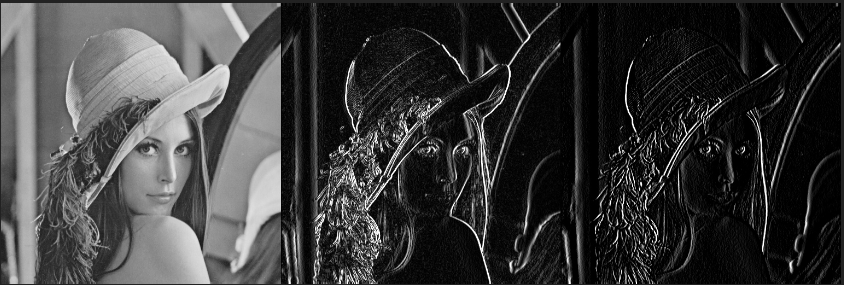

### 比較一次與兩次計算偏微分的結果

In [4]:
img_grey = cv2.cvtColor( img_bgr, cv2.COLOR_BGR2GRAY )

# 求一次導數取得邊緣檢測結果
img_Sobel_x = cv2.Sobel( img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3 )
img_Sobel_x = cv2.convertScaleAbs( img_Sobel_x )

# 求二次導數取得邊緣檢測結果
img_Sobel_xx = cv2.Sobel( img_grey, cv2.CV_16S, dx=2, dy=0, ksize=3 )
img_Sobel_xx = cv2.convertScaleAbs( img_Sobel_xx )

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_Sobel_x, img_Sobel_xx))
while True:
    cv2.imshow( 'Edge Detection', img_show )
    cv2.imwrite( 'Edge_Detection_dx_vs_dxdx.jpg', img_show )
    
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break

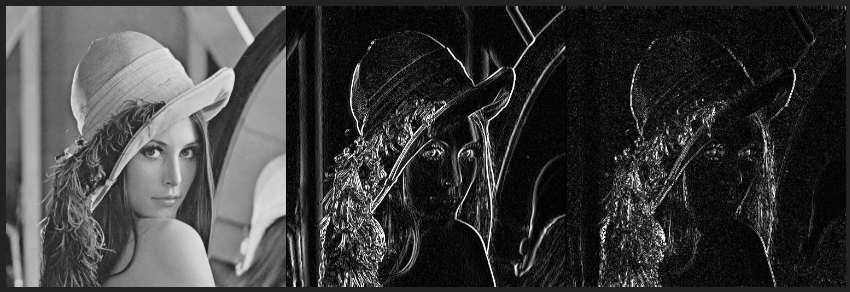